In [4]:
import pandas as pd

DATASET_PATH = '../data/IPL_2022_tweets.csv'

df = pd.read_csv(DATASET_PATH)

/var/folders/8j/bjl1qqwx03b77cv5tqpmdnvm0000gn/T/ipykernel_4928/2619982709.py:6: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATASET_PATH)


# Data preprocessing
1. handle missing values
2. text cleaning: remove special characters, punctuation, urls, convert text to lowercase, tokenisation, remove stopwords, lemmatisation


In [ ]:
# Select columns of interest
columns_of_interest = ['user_name','user_verified','user_location', 'user_followers', 'date', 'text', 'hashtags']
df_selected = df[columns_of_interest]

In [ ]:
#Handle missing values
missing_values = df_selected.isnull().sum()
#dropping rows with missing values
df_selected.dropna(subset=['user_name','user_location','user_followers','text', 'date', 'hashtags'], inplace=True)
#check sum of null values for each column
print(df_selected.isnull().sum())

<ipython-input-4-9f6ac22cb4a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['user_name','user_location','user_followers','text', 'date', 'hashtags'], inplace=True)


user_name         0
user_verified     0
user_location     0
user_followers    0
date              0
text              0
hashtags          0
dtype: int64


In [ ]:
import re

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

df_selected_copy = df_selected.copy()

# Apply the function to the 'text' column of the copied DataFrame
df_selected_copy['text'] = df_selected_copy['text'].apply(remove_urls)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens

# Apply text preprocessing to the 'text' column of the copied DataFrame
df_selected_copy['cleaned_text'] = df_selected_copy['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def extract_player_names(text):
    tokens = word_tokenize(text)
    player_names = [token.replace('@', '') for token in tokens if token.startswith('@') or any(char.isupper() for char in token)]
    # Clean player names (remove emojis) and remove '@' symbol
    player_names = [name.replace('@', '') for name in player_names]
    player_names = [name.encode('ascii', 'ignore').decode('ascii') for name in player_names]
    return player_names

# Apply the function to extract player names from the 'text' column of the copied DataFrame
df_selected_copy['player_names'] = df_selected_copy['text'].apply(extract_player_names)

In [ ]:
#check the added columns "cleaned_text" and  "player_names"
print(df_selected_copy.head())

            user_name user_verified user_location  user_followers  \
0  World Cricket Baba         False         india          1076.0   
1  The Times Of India          True     New Delhi      14429584.0   
2  World Cricket Baba         False         india          1076.0   
3       𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝         False         India           124.0   
4  World Cricket Baba         False         india          1076.0   

                  date                                               text  \
0  2022-06-20 22:00:03  👉World Cricket Baba!👈 Top Countries With the \...   
1  2022-06-20 21:30:00  How fans of @ViratGang @BoldBrigade @Fanaticso...   
2  2022-06-20 20:00:24  👉World Cricket Baba!👈 Top Countries With the \...   
3  2022-06-20 19:10:00  @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...   
4  2022-06-20 19:00:18  👉World Cricket Baba!👈 Top Countries With the \...   

                                            hashtags  \
0  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...   
1   ['IPL2

# Identify influential users
Analyze influential user names >100k followers

In [ ]:
# Sort the DataFrame by 'user_followers' in descending order
df_selected_copy.sort_values(by='user_followers', ascending=False, inplace=True)

# Filter users with more than 100,000 followers
threshold = 100000
df_influential_users = df_selected_copy[df_selected_copy['user_followers'] > threshold]

# Count occurrences of each distinct user_name
user_name_counts = df_influential_users['user_name'].value_counts()

# Display top 10 influential users with the most followers
top_10_influential_users = df_influential_users.drop_duplicates(subset='user_name').head(10)

# Display the user_name with the highest count of occurrences
most_frequent_user = user_name_counts.idxmax()
max_count = user_name_counts.max()

# Sort the Series by its values in descending order
user_name_counts_sorted = user_name_counts.sort_values(ascending=False)

# Print results
print("Top 10 Influential Users with the Most Followers:")
print(top_10_influential_users[['user_name', 'user_followers']])

print("\nUser with the Highest Occurrence Count:", most_frequent_user, "with count:", max_count)

print("\nNew Dataframe - User Name Counts:")
print(user_name_counts_sorted.head())

Top 10 Influential Users with the Most Followers:
                   user_name  user_followers
3121          Suresh Raina🇮🇳      20111374.0
7435                    NDTV      17119431.0
13406     The Times Of India      14440369.0
13654   Harbhajan Turbanator      11804839.0
5149               TIMES NOW      10251898.0
16303           Rajat Sharma       9883378.0
212406      Rajdeep Sardesai       9041469.0
568514         Harsha Bhogle       8815188.0
237641       Hindustan Times       8480205.0
19481    IndianPremierLeague       7927152.0

User with the Highest Occurrence Count: TOI Sports with count: 2615

New Dataframe - User Name Counts:
TOI Sports             2615
CricketNext            1682
HT Sports              1545
IndianPremierLeague    1300
ESPNcricinfo           1224
Name: user_name, dtype: int64


# Sentiment Analysis
- use VADER sentiment intensity analyzer
- Match Important Player Names with Sentiment Analysis:
- Calculate overall sentiment scores for the entire community of IPL fans.



In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Obtain sentiment scores for each tweet
sentiments = []
for text_list in df_selected_copy['cleaned_text']:
    text = ' '.join(text_list)  # Join the list of tokens into a single string
    sentiment = sid.polarity_scores(text)
    sentiments.append(sentiment)

# Add sentiment scores to the DataFrame
df_selected_copy['sentiment'] = sentiments

# Print the DataFrame to check the added sentiment scores
print(df_selected_copy[['cleaned_text', 'sentiment']])


                                             cleaned_text  \
3121    ['s, wrap, .., #, IPL2022, wholesome, experien...   
102649  [think, win, tonight, ., Ready, day, 🎙, #, IPL...   
94735   [Lauding, lion, !, !, Superb, inning, @, rinku...   
487660  [Another, day, another, match, remember, ., Gr...   
463621  [brilliant, game, team, ., Another, day, crick...   
...                                                   ...   
132655  [@, ViCustomerCare, Ans-, Jitesh, Sharma, #, V...   
132743  [@, ViCustomerCare, Ans-, 9th, match, #, ViFan...   
467127  [Bowl, one, ball, give, 8, run, #, dube, #, IP...   
525374  [matter, start, always, finish, like, Dhoni, ....   
184320  [👊, Gujarat, Titans, V., Sunrisers, Hyderabad,...   

                                                sentiment  
3121    {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...  
102649  {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'comp...  
94735   {'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...  
487660  {'neg': 0.0, 'neu':

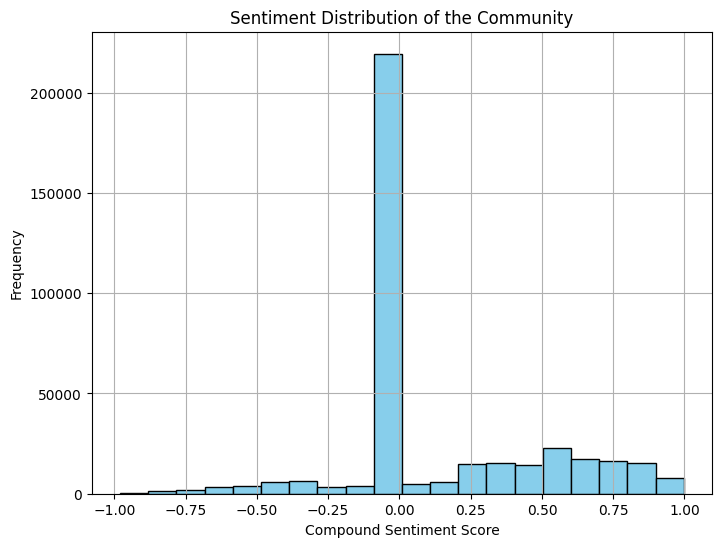

In [ ]:
import matplotlib.pyplot as plt

# Extract compound sentiment scores
compound_sentiments = [sentiment['compound'] for sentiment in df_selected_copy['sentiment']]

# Plot histogram of compound sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(compound_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of the Community')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#A score closer to 1 indicates a more positive sentiment, while a score closer to -1 indicates a more negative sentiment. A score around 0 suggests a neutral sentiment.
#If the histogram is relatively symmetric around 0, it suggests a balanced mix of positive, negative, and neutral sentiments.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-13-7b667a7b1b87>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_influential_users['sentiment'] = sentiments


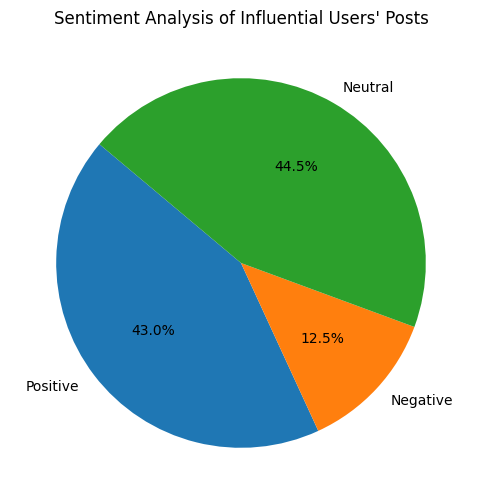

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each post
sentiments = []
for text_list in df_influential_users['cleaned_text']:
    text = ' '.join(text_list)  # Join the list of tokens into a single string
    sentiment = sid.polarity_scores(text)
    sentiments.append(sentiment)

#Add sentiment scores to the DataFrame
df_influential_users['sentiment'] = sentiments

# Analyze the sentiment of each post and categorize them as positive, negative, or neutral
positive_count = 0
negative_count = 0
neutral_count = 0
for sentiment in sentiments:
    if sentiment['compound'] >= 0.05:
        positive_count += 1
    elif sentiment['compound'] <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1

# Visualize the sentiment analysis results using a pie chart
sentiment_counts = [positive_count, negative_count, neutral_count]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis of Influential Users\' Posts')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK stopwords
nltk.download('stopwords')

# Flatten the lists of player names
all_player_names = [name for sublist in df_selected_copy['player_names'] for name in sublist]

# Additional filtering to remove some names
common_non_player_terms = ['','Super','Gujarat','Kings','Kohli','Dhoni','ViFanOfTheMatch','ViCustomerCare','IPL', 'Team', 'Match', 'Player', 'Hashtag', 'Cricket','India','I','Win','India','Ans','Mumbai','Runs','April','TATAIPL','Join','Answer','Wickets','CricketTwitter','ChennaiIPL','WhistlePodu','MumbaiIndians','Live','TATAIPL2022','MI']
stop_words = set(stopwords.words('english'))
filtered_player_names = [name for name in all_player_names if name not in common_non_player_terms and name.lower() not in stop_words]

# Count the frequency of each player name
player_name_counts = Counter(filtered_player_names)

# Get the most frequent player names
most_common_player_names = player_name_counts.most_common(30)

# Print the most frequent player names
print("Most Frequent Player Names:")
for name, count in most_common_player_names:
    print(f"{name}: {count} mentions")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Frequent Player Names:
IPL2022: 377153 mentions
CSK: 27931 mentions
RCB: 24577 mentions
KKR: 13768 mentions
LSGvCSK: 10629 mentions
IPLAuction: 10284 mentions
DelhiCapitals: 9903 mentions
CSKvRCB: 9591 mentions
KKRvPBKS: 8204 mentions
RR: 8162 mentions
CSKvPBKS: 7856 mentions
DCvRR: 7625 mentions
MIvPBKS: 7609 mentions
MIvCSK: 7478 mentions
RCBvKKR: 7446 mentions
LSG: 7345 mentions
PBKS: 7342 mentions
MSDhoni: 7205 mentions
SRHvGT: 7157 mentions
ViratKohli: 7118 mentions
LSGvRCB: 7047 mentions
RRvGT: 6818 mentions
SRH: 6698 mentions
Lucknow: 6472 mentions
PBKSvCSK: 6468 mentions
BCCI: 6318 mentions
GTvSRH: 6296 mentions
RRvMI: 5971 mentions
GT: 5902 mentions
GTvDC: 5824 mentions


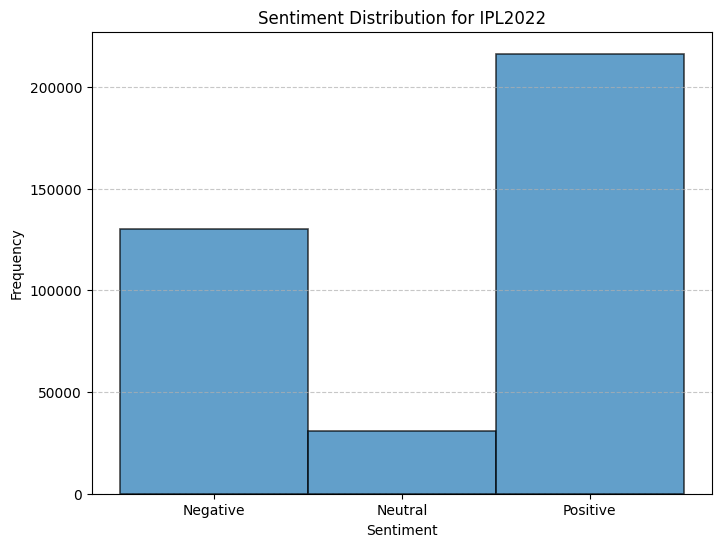

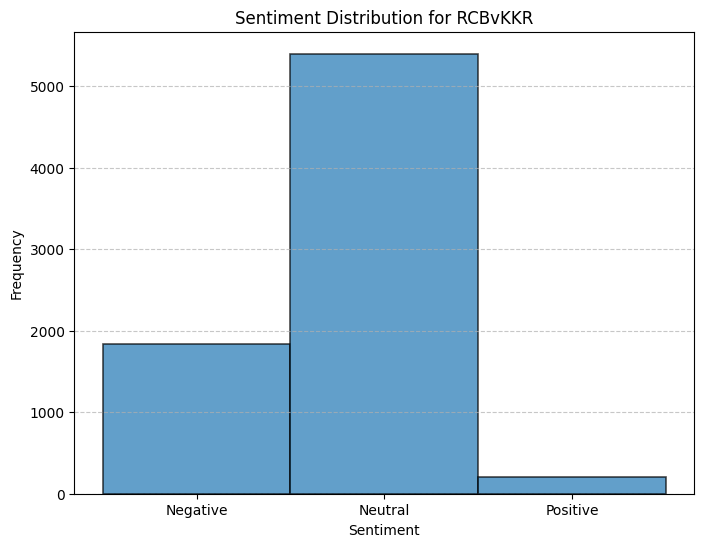

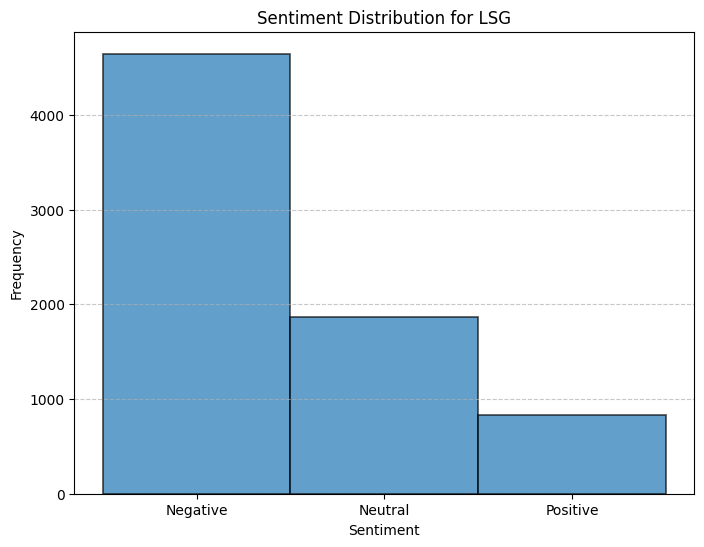

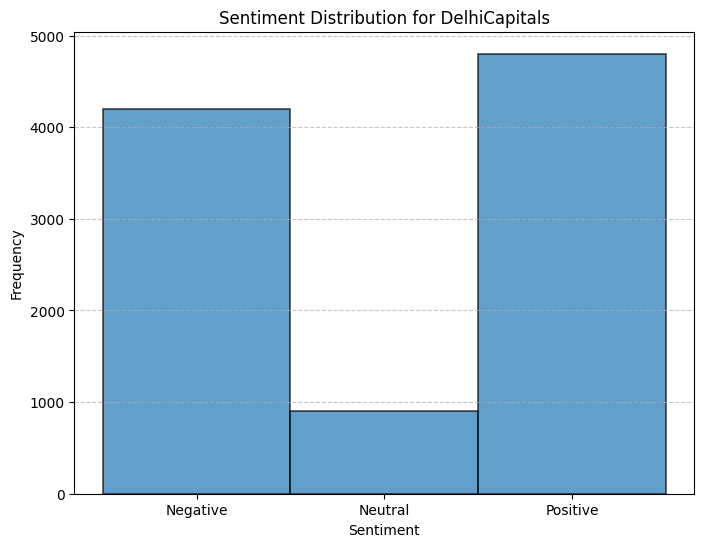

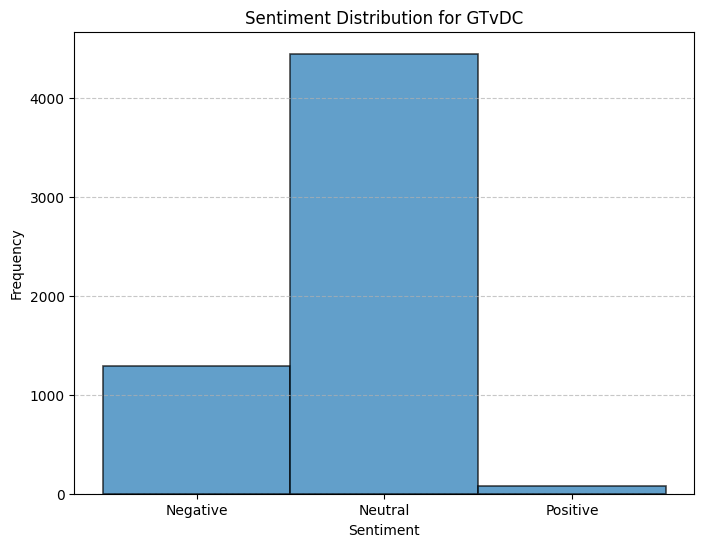

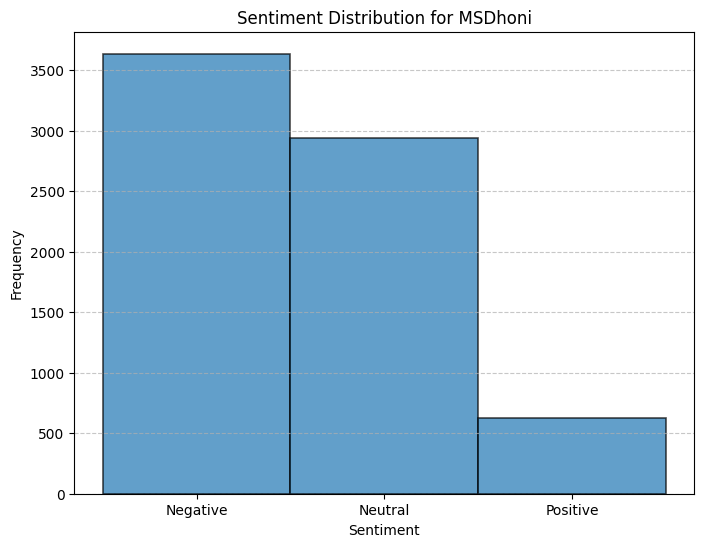

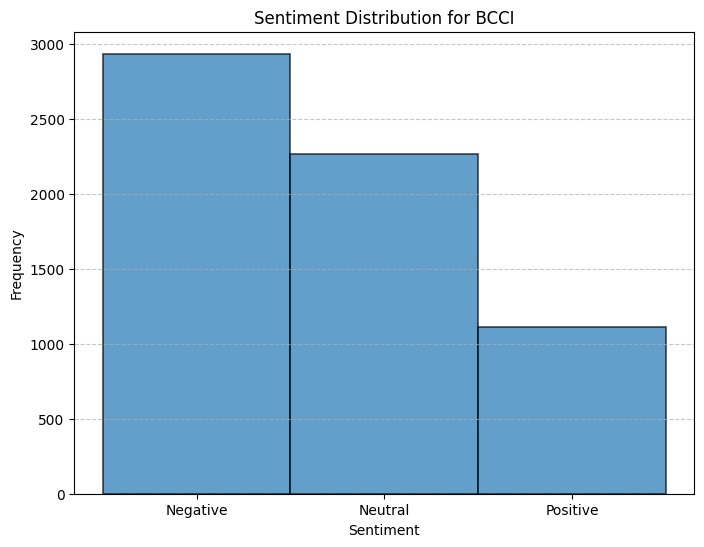

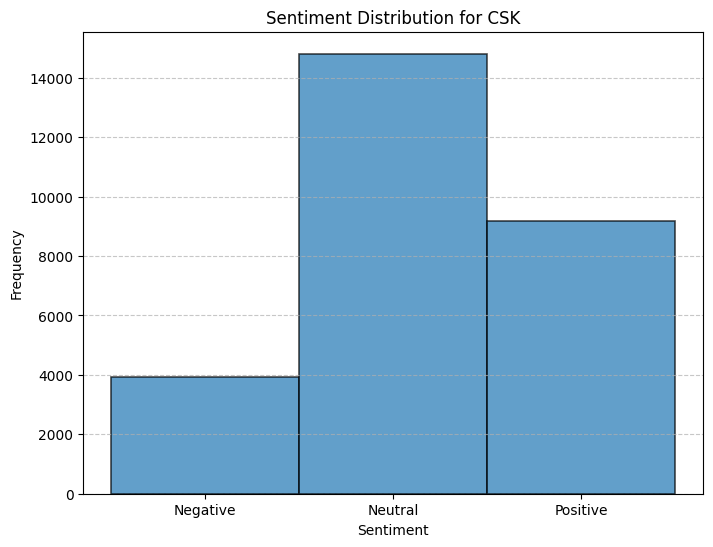

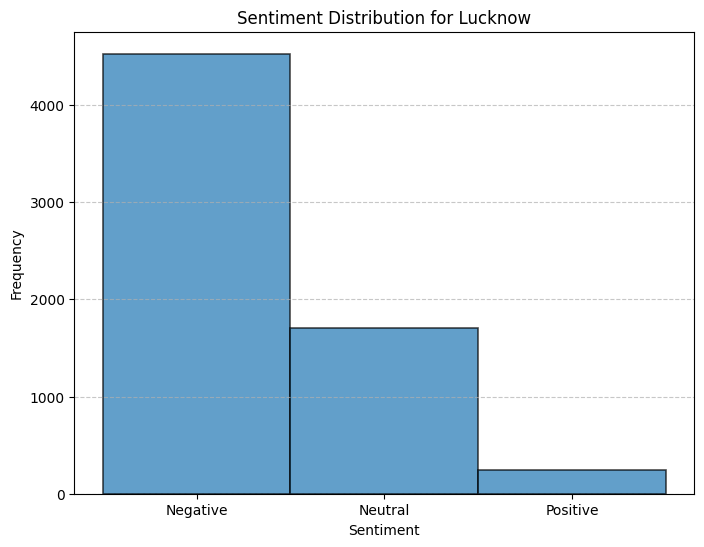

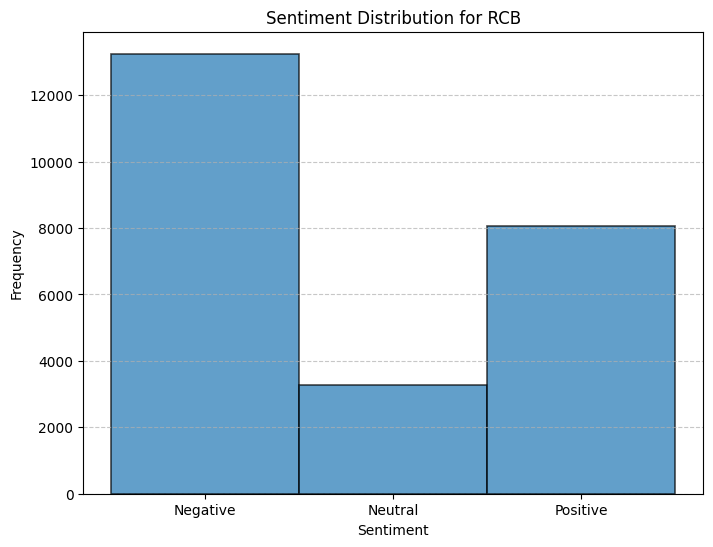

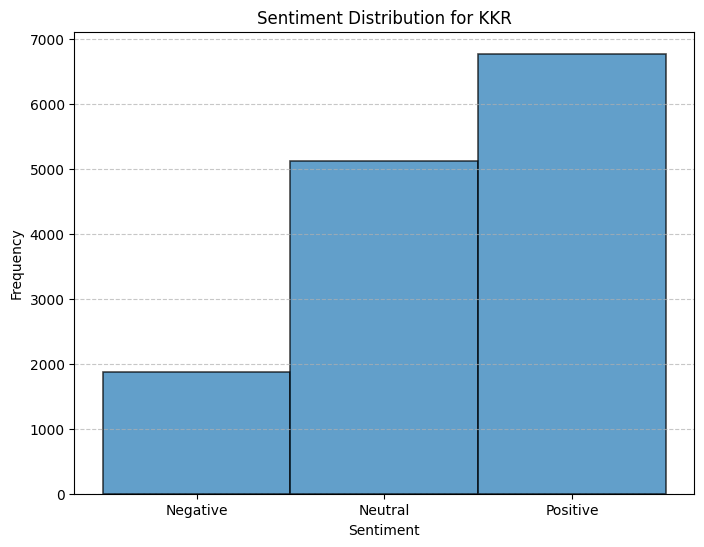

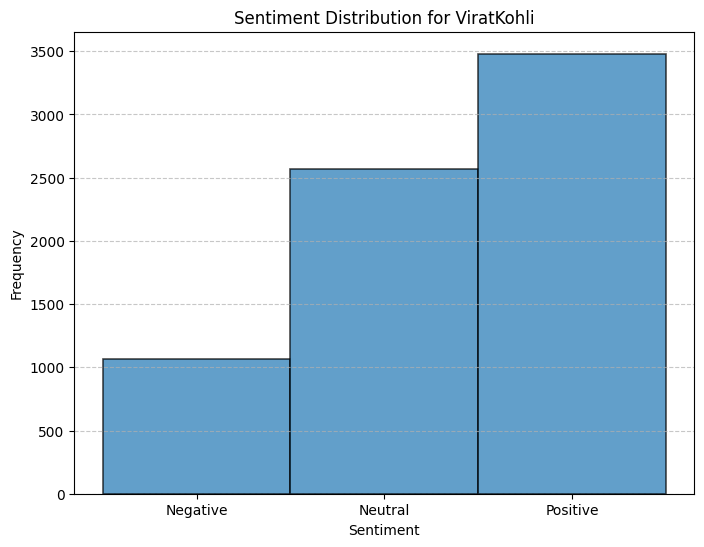

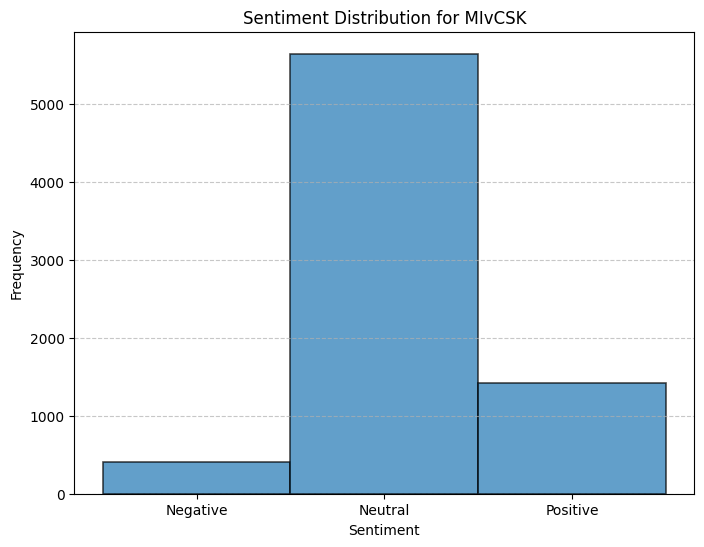

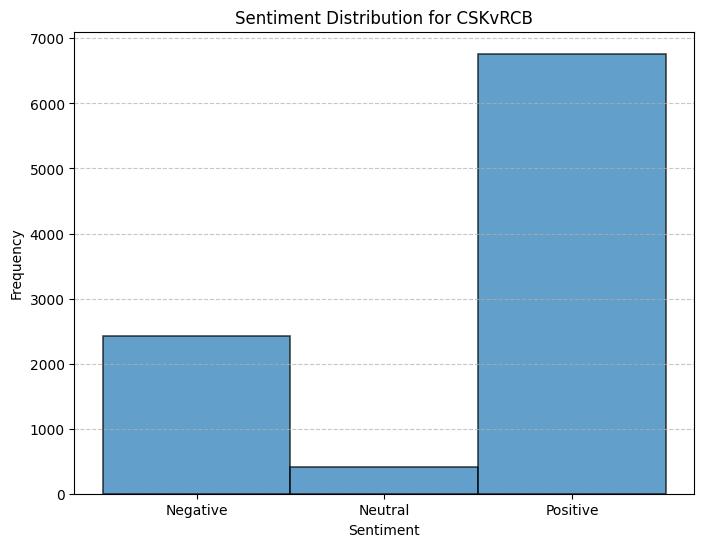

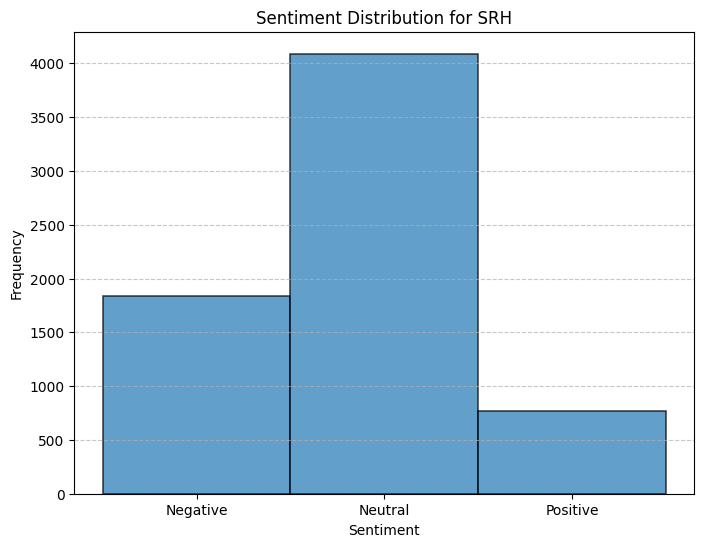

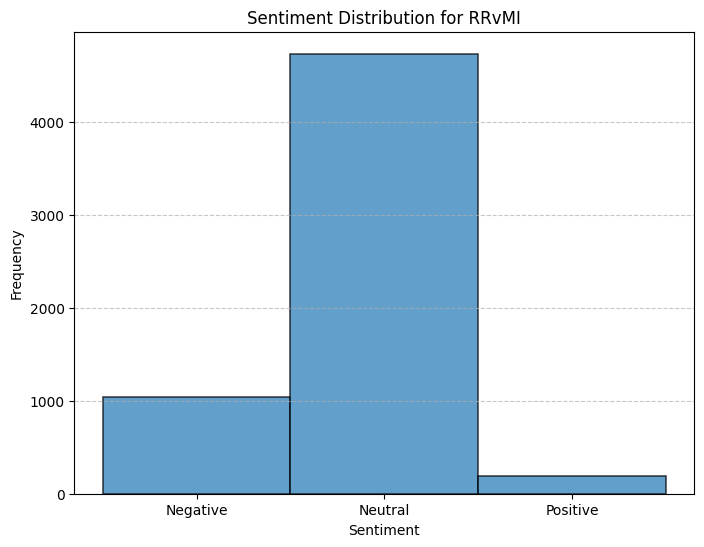

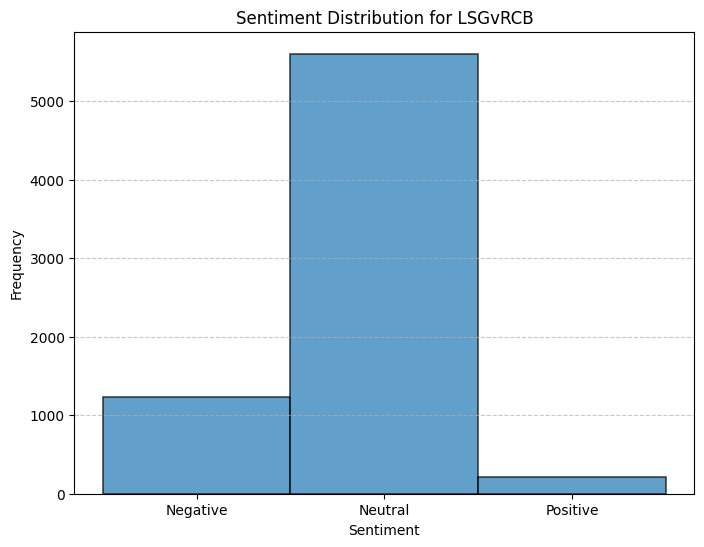

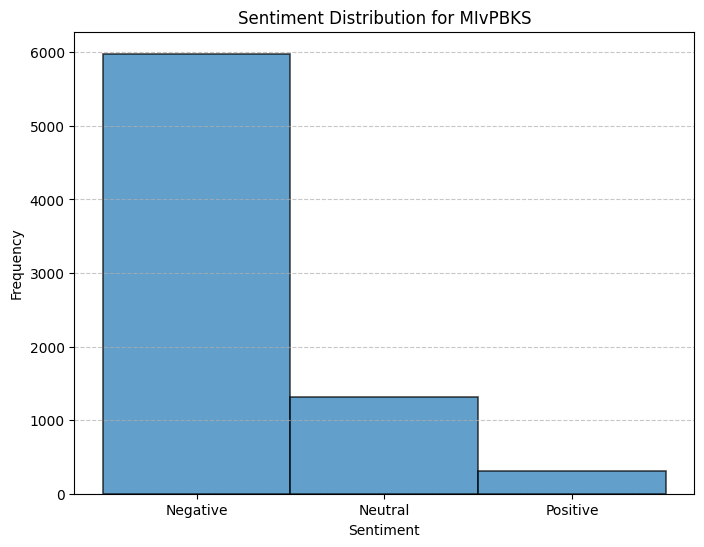

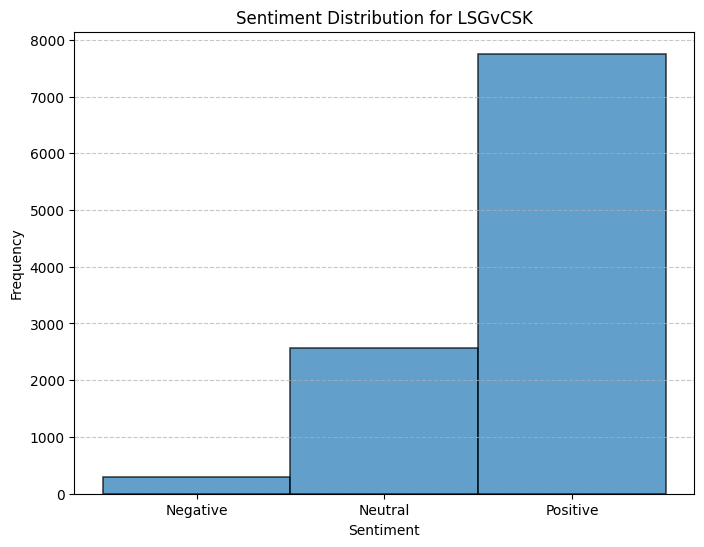

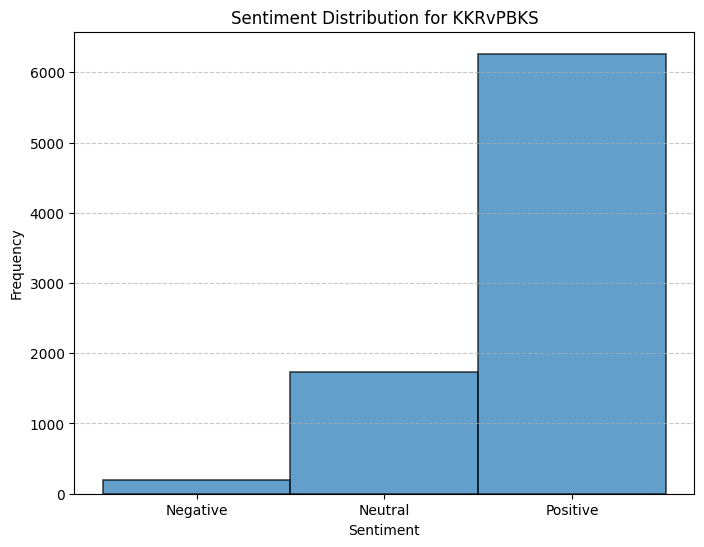

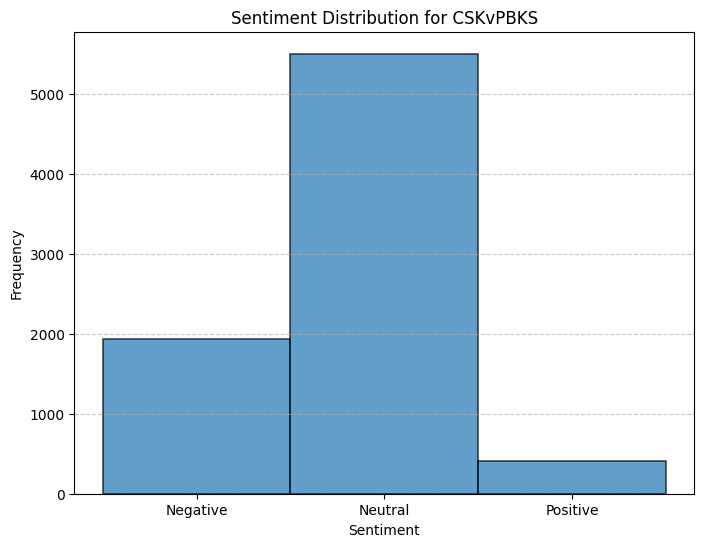

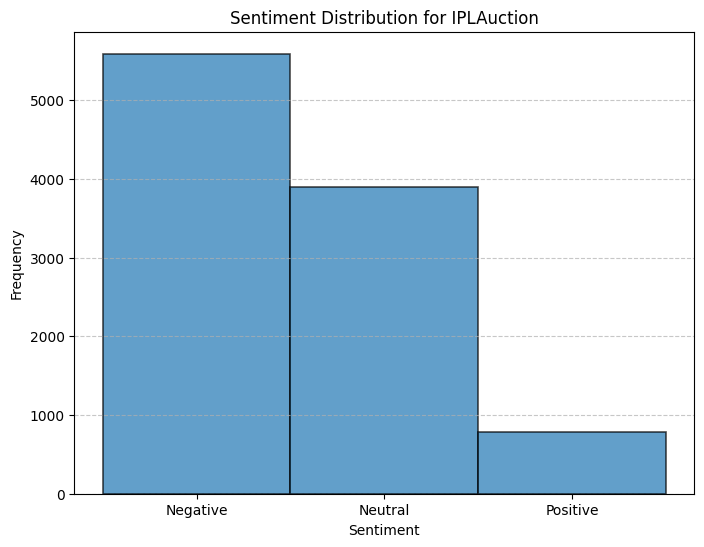

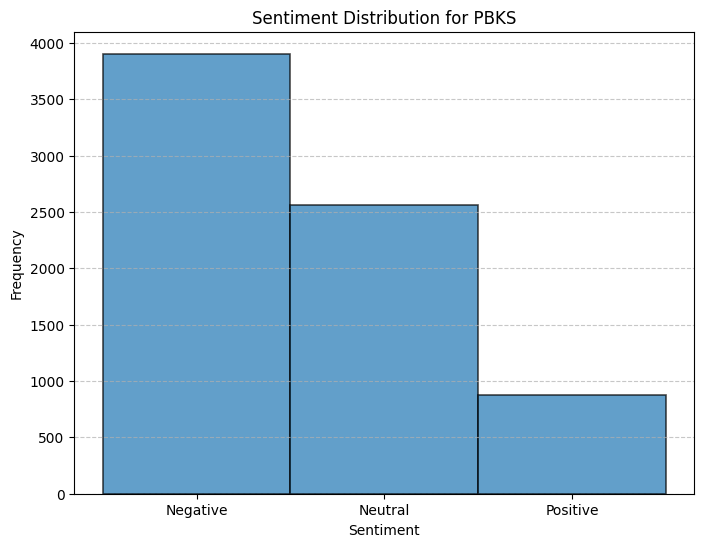

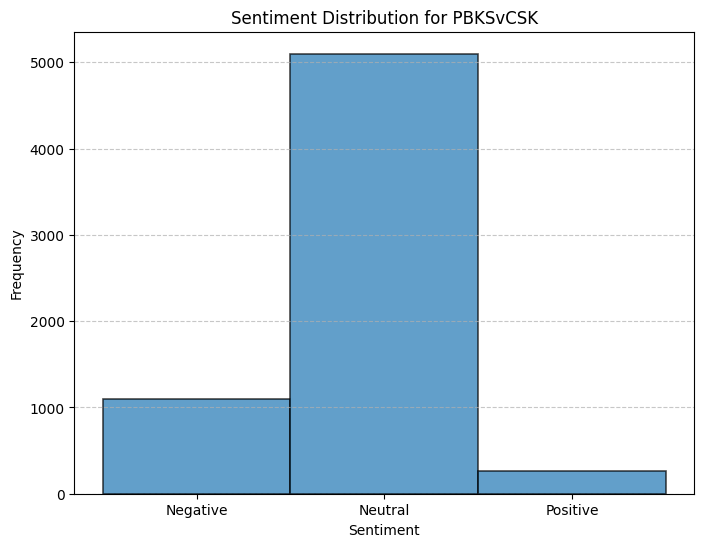

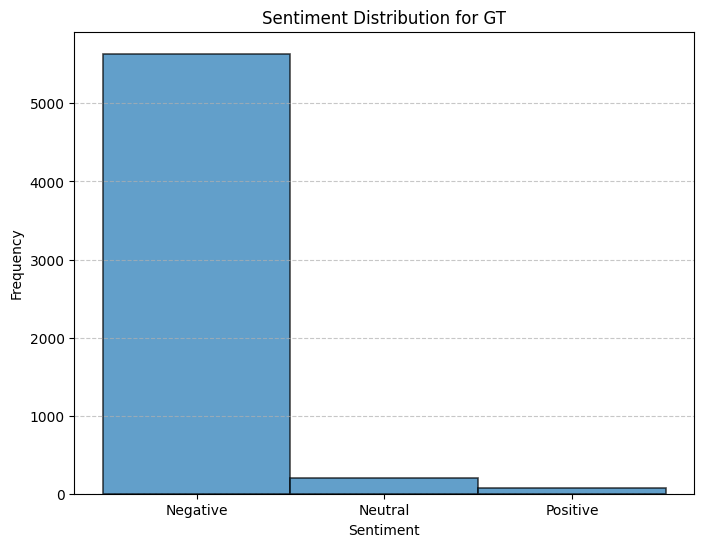

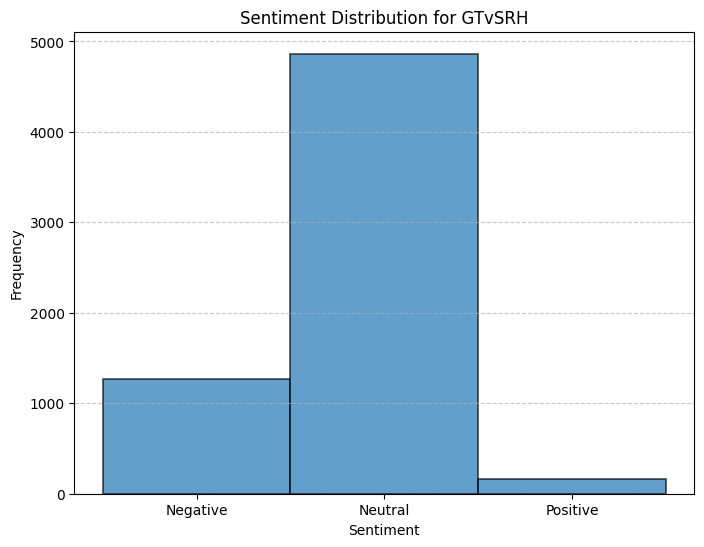

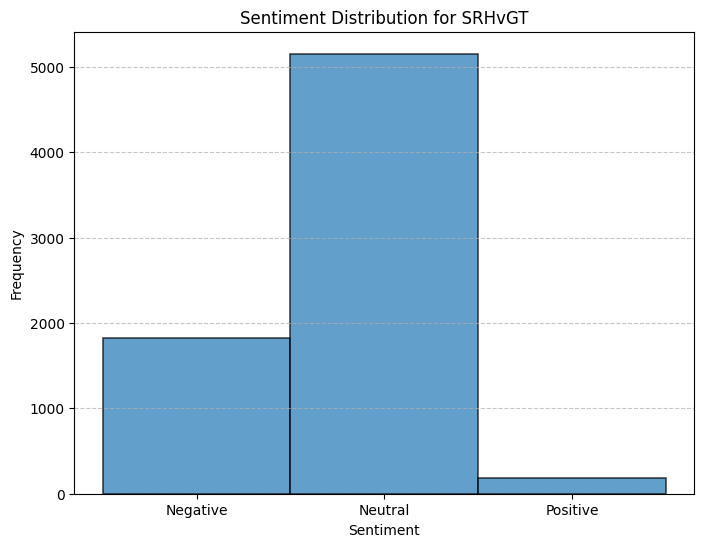

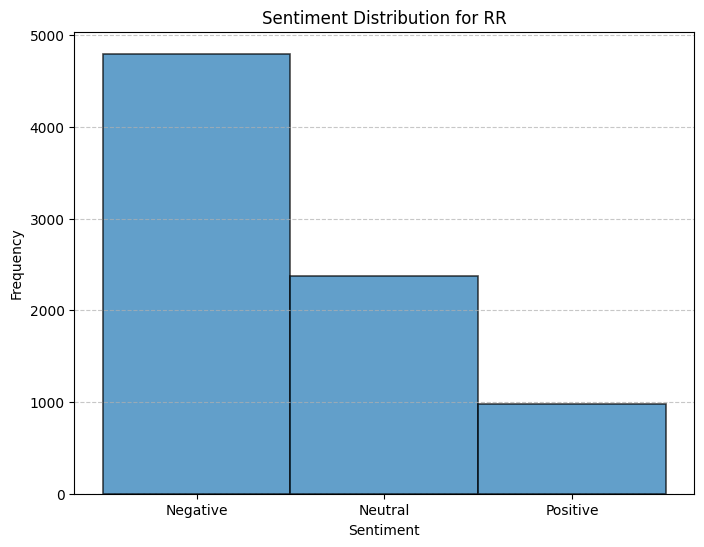

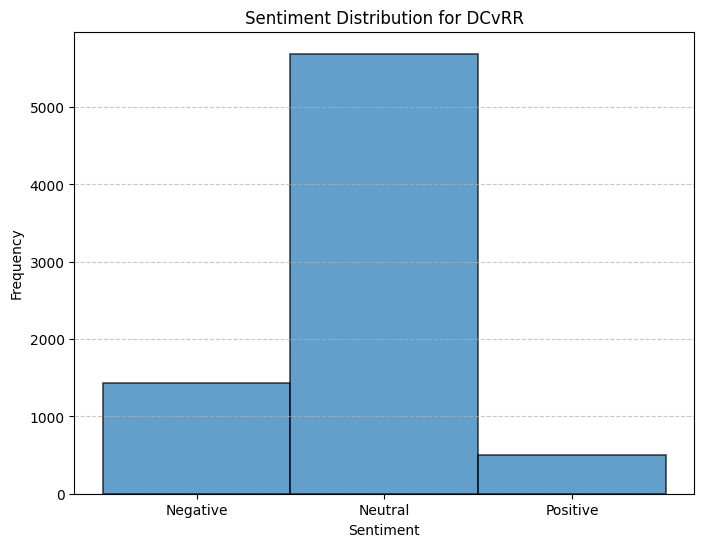

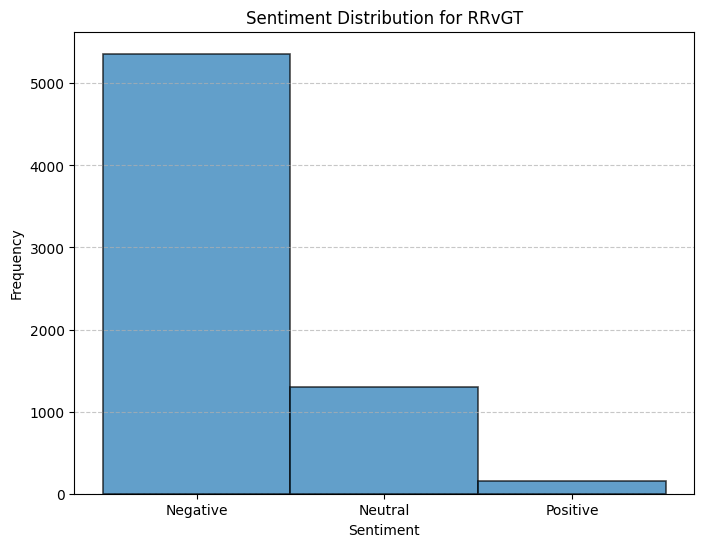

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to store sentiment scores and labels for each player
player_sentiments = {}

# Iterate through each row in the DataFrame
for index, row in df_selected_copy.iterrows():
    # Extract player names and sentiment from the row
    player_names = row['player_names']
    sentiment = row['sentiment']

    # Associate sentiment with each player mentioned in the row
    for player in player_names:
        # Check if the player is in the most common player names list
        if player in [name for name, _ in most_common_player_names]:
            # Determine sentiment label
            if sentiment['compound'] >= 0.05:
                sentiment_label = 'Positive'
            elif sentiment['compound'] <= -0.05:
                sentiment_label = 'Negative'
            else:
                sentiment_label = 'Neutral'

            # Add sentiment score and label to the player's entry in the dictionary
            if player in player_sentiments:
                player_sentiments[player].append((sentiment['compound'], sentiment_label))
            else:
                player_sentiments[player] = [(sentiment['compound'], sentiment_label)]


# Visualize sentiment distribution for each player
for player, sentiments in player_sentiments.items():
    # Extract sentiment scores and labels
    scores = [score for score, _ in sentiments]
    labels = [label for _, label in sentiments]

    # Plot sentiment distribution
    plt.figure(figsize=(8, 6))
    plt.hist(labels, bins=np.arange(4) - 0.5, alpha=0.7, edgecolor='black', linewidth=1.2)
    plt.title(f"Sentiment Distribution for {player}")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
